In [3]:
from glob import glob
import pandas as pd
import re
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
filepaths = sorted(glob("inauguralspeeches/*.txt"))

In [5]:
def tokenize(txt):
    name, date, content = txt.split("\t")
    tokens = re.split("\W+", content)
    tokens = [t.lower() for t in tokens if t]
    return name, date, tokens

In [6]:
def frameforpath(filepath):
    with open(filepath) as f:
        txt = f.read()
        name, date, tokens = tokenize(txt)
        m = re.search( "([0-9]{4})", date)
        year = m.group()
        tmp = pd.DataFrame(tokens)
        tmp.columns = ['token']
        tmp['name'] = name
        tmp['year'] = year
        tmp['seq'] = tmp.index
    return tmp

In [7]:
df = pd.DataFrame()
for filepath in filepaths:
    df = df.append(frameforpath(filepath))

In [8]:
# df is a frame with token, name, year, sequence for all tokens

In [ ]:
df.to_csv("inaug_tokens.csv", sep="\t", index=None)

In [9]:
names = df[['name']].drop_duplicates()

In [10]:
tokens = df[['token','seq']].groupby(["token"]).count()
tokens.columns = ['count']

In [11]:
tokenyears = df[['token','year','seq']].groupby(["token",'year']).count()
tokenyears.columns = ['count']
ty = tokenyears.reset_index().pivot_table(index="token", columns='year', values="count")

In [ ]:
tokens.to_csv("tokens.csv", sep="\t", float_format="%0d")
ty.to_csv("tokenyears.csv", sep="\t", float_format="%0d")

In [12]:
vocabyear = ty.count()

In [21]:
termfreq = pd.DataFrame(ty.sum(axis=1).sort_values(ascending=False))
termfreq.columns=['tf']
docfreq = pd.DataFrame(ty.count(axis=1).sort_values(ascending=False))
docfreq.columns=['df']

In [14]:
docfreq = docfreq.reset_index()

In [ ]:
docfreq.to_csv("df.csv", sep="\t", index=None)

In [22]:
tfdf = termfreq.merge(docfreq, left_index=True, right_index=True)

In [24]:
tfdf

,tf,df
token,,
this,835.0,58
that,1805.0,58
be,1486.0,58
have,999.0,58
to,4541.0,58
it,1390.0,58
has,622.0,58
all,819.0,58
the,10101.0,58


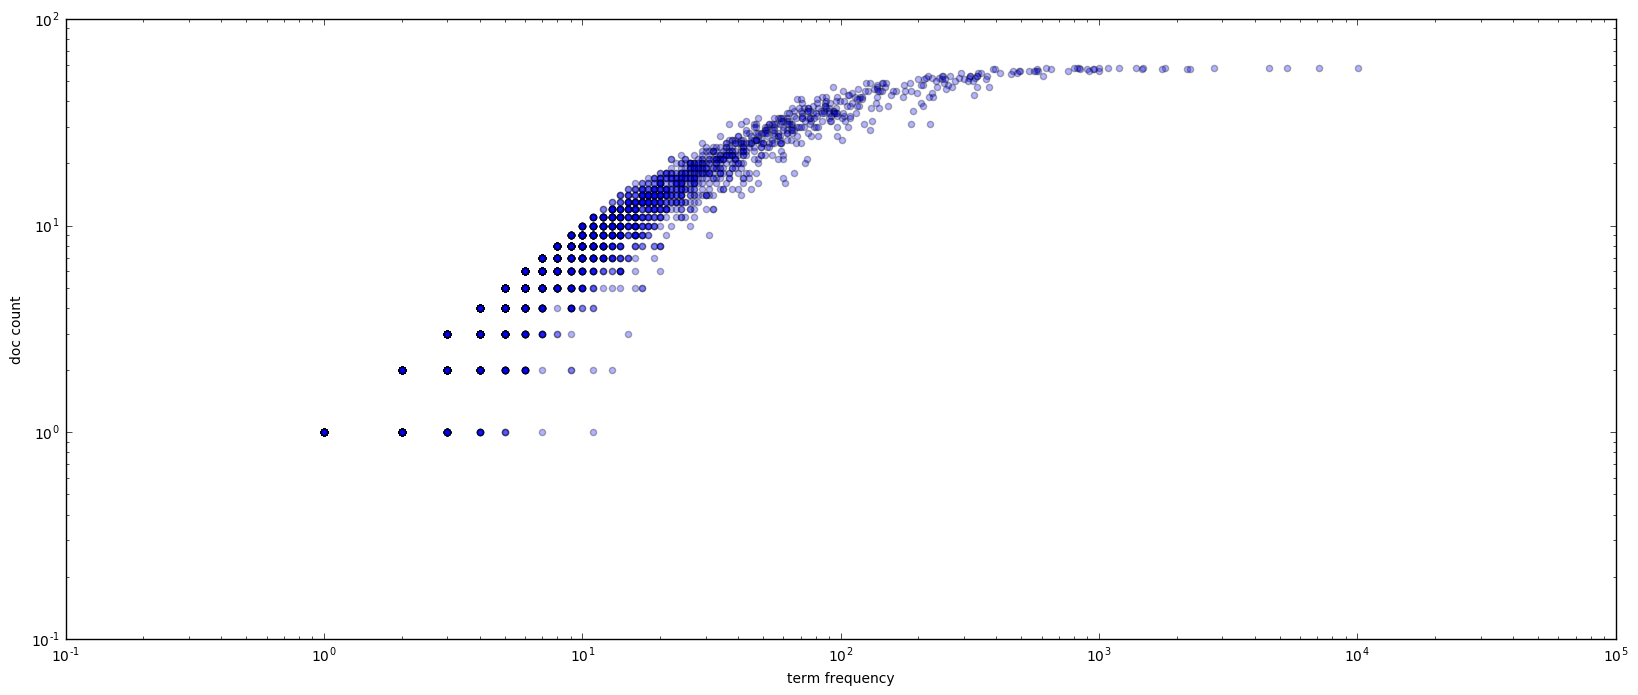

In [25]:
plt.figure(figsize=(20,8))
plt.yscale("log")
plt.xscale("log")
plt.xlabel("term frequency")
plt.ylabel("doc count")
#plt.scatter(tfdf.query("tf<80")['tf'],tfdf.query("tf<80")['df'], alpha=0.3)
plt.scatter(tfdf['tf'],tfdf['df'], alpha=0.3)

In [26]:
tfdf.query("df==1 and tf<=10 and tf>2").merge(df, left_index=True, right_on="token").groupby(['tf','token','name','year']).count()

df  seq
tf  token        name                   year         
3.0 antitrust    William Howard Taft    1909   3    3
    array        Calvin Coolidge        1925   3    3
    blowing      George H. W. Bush      1989   3    3
    checked      William Henry Harrison 1841   3    3
    criminals    Herbert Hoover         1929   3    3
    disputed     William Henry Harrison 1841   3    3
    dissatisfied Abraham Lincoln        1861   3    3
    domingo      Ulysses S. Grant       1873   3    3
    familiar     Woodrow Wilson         1913   3    3
    frugality    Grover Cleveland       1893   3    3
    fugitive     Abraham Lincoln        1861   3    3
    incumbents   James A. Garfield      1881   3    3
    levying      James K. Polk          1845   3    3
    liquor       Herbert Hoover         1929   3    3
    m            Ronald Reagan          1981   3    3
    mastery      Lyndon B. Johnson      1965   3    3
    metallic     William Henry Harrison 1841   3    3
    monarchy     William Henry Harrison 1841   3    3
    notes        James A. Garfield      1881   3    3
    obama        Donald Trump           2017   3    3
    observable   William Henry Harrison 1841   3    3
    offenses     Abraham Lincoln        1865   3    3
    reunion      James K. Polk          1845   3    3
    rhetoric     Richard Nixon          1969   3    3
    santo        Ulysses S. Grant       1873   3    3
    stirred      Woodrow Wilson         1913   3    3
    stricken     Franklin D. Roosevelt  1933   3    3
    strives      Dwight D. Eisenhower   1957   3    3
    studied      Woodrow Wilson         1913   3    3
    technical    Harry S. Truman        1949   3    3
    transit      Ulysses S. Grant       1873   3    3
    woe          Abraham Lincoln        1865   3    3
4.0 aristocracy  William Henry Harrison 1841   4    4
    compromises  James K. Polk          1845   4    4
    lock         William Howard Taft    1909   4    4
    remark       William Henry Harrison 1841   4    4
    represents   Calvin Coolidge        1925   4    4
    secede       Abraham Lincoln        1861   4    4
    wished       Woodrow Wilson         1917   4    4
5.0 breeze       George H. W. Bush      1989   5    5
    cuba         William McKinley       1901   5    5
    type         William Howard Taft    1909   5    5
7.0 roman        William Henry Harrison 1841   7    7

In [27]:
tfdf.query("df==1 and tf==2").merge(df, left_index=True, right_on="token").groupby(['token','name','year']).count()

,,,tf,df,seq
token,name,year,,,
1815,James Monroe,1821,2,2,2
1817,James Monroe,1821,2,2,2
1818,James Monroe,1821,2,2,2
1890,William McKinley,1897,2,2,2
1980,Ronald Reagan,1985,2,2,2
19th,Bill Clinton,1997,2,2,2
30,Lyndon B. Johnson,1965,2,2,2
50th,Ronald Reagan,1985,2,2,2
abide,Abraham Lincoln,1861,2,2,2


In [28]:
print("words that appear just twice, and only in one inaugural:\n")
print(" ".join(tfdf.query("df==1 and tf==2").index))

words that appear just twice, and only in one inaugural:

discountenanced 19th abounding divorce 30 1980 abide abnormal 50th duly 1815 1817 acclaim districts echoes 1818 1890 aught attributable complained compensated athens compulsory composing complications caesar burthen bosoms boycott changers caught catch deliverance defrayed deposits dependable defamation aggregations adjusting directs dingley dimensions affirmed affords developments adventure applicants aright contentions contended consummate consult angry amiable crosses antagonist covered croix critical annexation crave rocket row safeguarding ruthless sabine rides residing restraining riders resentment restrictions rico soviets situated shunned smallest shoulder secession shift shine pristine polls politicians porto preferment precepts regime reaches railway recollected unhallowed unselfishness unequaled unfair whites whirlwind wouldn york worlds visit voted vow trillions suit squandering st staggering stakes stamina spiritual

In [29]:
print("words that appear three or more times, and only in one inaugural:\n")
print(" ".join(tfdf.query("df==1 and tf>=3").index))

words that appear three or more times, and only in one inaugural:

domingo disputed dissatisfied compromises blowing breeze checked aristocracy array cuba antitrust criminals roman santo represents rhetoric reunion secede remark type wished woe strives studied stricken stirred transit technical incumbents fugitive frugality familiar obama observable notes offenses monarchy interstate mastery metallic lock liquor levying m


In [30]:
print("words that appear four or more times, and only in two inaugurals:\n")
print(" ".join(tfdf.query("df==2 and tf>=4").index))

words that appear four or more times, and only in two inaugurals:

intimate crucial ceded texas dissensions amongst regards engagement dependencies acquiesce related breath discriminating houses revision revival discriminations aliens electors incidental incoming trials statutes silver negroes neighboring negro door clause philippines moon philosophy spain paint board operations weapon song officials concluded unshaken colonies whatsoever occurrences westward conceive occasionally fifteenth loans separation ballot list cotton presidents productivity lawless lawfully selfishness 18th legislatures reorganization ships 20th voters pleasing merchant 21st mandates reports summary convene preceding major majorities suggestion marine


# So which words appear frequently but in relatively fewer documents?

In [32]:
pairs = [[7, 5], [15, 10], [22, 15], [30, 20], [37, 25], [45, 30], [52, 35], [60, 40]]
for tmin, dmax in pairs:
    print("More than {} instances in fewer than {} documents:\n".format(tmin, dmax))
    print(" ".join(tfdf.query("tf>{} and df<{}".format(tmin, dmax)).index)  + "\n\n")

More than 7 instances in fewer than 5 documents:

surrendered covenant proposition speedily minority suitable appears preparation employees fortifications recovery amendments regulation railroads don dollar t canal texas negro loans ballot interstate


More than 15 instances in fewer than 10 documents:

trial offices challenges sentiments leadership false commercial event construction why term policies unless tariff existing sides connected confederacy army dreams naval tax journey territories voices authorities jurisdiction amendment enforcement story re coast ve


More than 22 instances in fewer than 15 documents:

equally across forms settled supreme religious special enough election something industrial complete happy improvement consideration destruction values age peoples property granted mere intercourse secured opinions prevent acts formed reform effective indeed protected legislative mr south thank officers majority ideals treaty sovereignty currency department slavery feeling

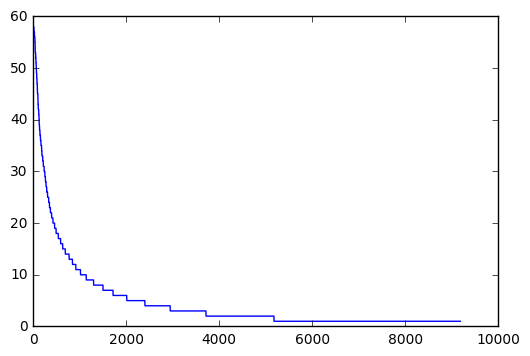

In [35]:
plt.plot(docfreq.values)

In [36]:
nd = 29
ser = docfreq[docfreq['df']>nd]
print("{} terms that appear in {} or more inaugurals\n".format(len(ser), nd))
print(" ".join(ser.index))

251 terms that appear in 29 or more inaugurals

this that be have to it has all the in for and of by are as is an our but a with we from i so not on no will people been my or its their which can us at great these they nation other may who time own world country citizens government more than those if when now must would every nations only there do shall any them free good just well before new fellow life most his united one rights men states future power upon was hope peace never justice into make american me each national war years without long s through under many among made should public confidence liberty right spirit what against out such less still give work best cannot place day over much first same you nor here themselves law he high duty political far faith god because constitution let part need office find had common take land way ever were president then freedom itself up others even purpose progress support come am human equal present history ourselves man see principles wit